# Cyclones: Exploratory Analysis

In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime 
import seaborn as sns
from matplotlib import pyplot as plt

from utils.cyclone_utils import get_datetime, get_cyclone_data

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

In [2]:
relevant_df = get_cyclone_data(basin=None, min_cat=1, one_per_id=True)
relevant_df['season_numeric'] = relevant_df['season'].apply(lambda x: int(x.split('-')[0]))

# full_df['longitude'] = full_df.loc[:,'Lon'].apply(lat_long_string_to_float)
# full_df['longitude'] = full_df.loc[:, 'longitude'].apply(lambda x: x if x > 0 else 360 + x)
# full_df['latitude'] = full_df.loc[:, 'Lat'].apply(lat_long_string_to_float)

# # for plotting
# full_df.loc[:,'season'] = full_df.loc[:, 'Time'].apply(lambda x: time_to_season((datetime.strptime(x, '%Y-%m-%d %X'))))
# full_df.loc[:,'Season'] = full_df.loc[:, 'season'].apply(lambda x: int(x.split('-')[0]))

# transform our latitude to overflow past 180 as we are interested in the eastern hemisphere

In [3]:
# only take a subset of columns for no
relevant_df
# NOTE: why is there a cyclone in July? is this a data error?

,id,Time,latitude,longitude,basin,Speed(knots),category,peak_wind,season,season_numeric
0,1,1981-07-25 12:00:00,-11.8,86.7,SI,20,1,30,1981-1982,1981
13,2,1981-10-21 06:00:00,-8.0,84.6,SI,40,2,85,1981-1982,1981
38,3,1981-11-03 18:00:00,-8.6,92.9,SI,55,2,80,1981-1982,1981
71,4,1981-12-05 00:00:00,-11.9,125.0,SI,45,1,45,1981-1982,1981
74,5,1981-12-29 00:00:00,-9.5,78.8,SI,20,1,45,1981-1982,1981
...,...,...,...,...,...,...,...,...,...,...
30412,998,2019-04-03 06:00:00,-8.2,132.3,SP,20,1,60,2018-2019,2018
30455,999,2019-04-21 18:00:00,-4.0,79.3,SI,20,3,90,2018-2019,2018
30456,1000,2019-04-21 18:00:00,-9.7,52.7,SI,20,4,125,2018-2019,2018
30512,1001,2019-05-06 12:00:00,-5.6,129.9,SI,20,1,55,2018-2019,2018


<Axes: xlabel='peak_wind', ylabel='Density'>

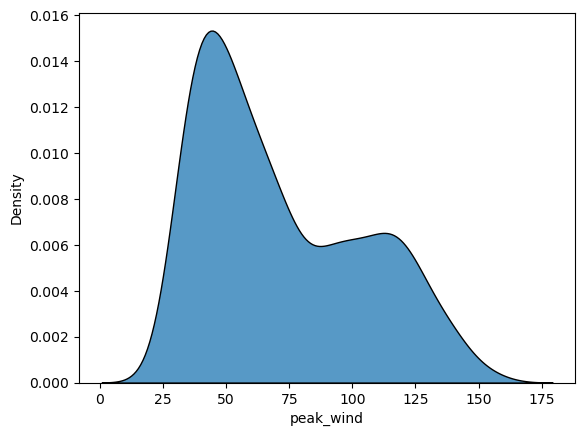

In [4]:
sns.kdeplot(data=relevant_df, x='peak_wind',  fill=True, multiple='stack')

<Axes: xlabel='season_numeric', ylabel='peak_wind'>

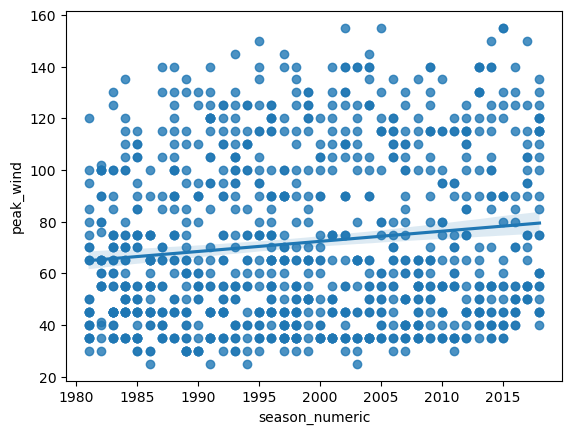

In [9]:
sns.regplot(data=relevant_df, x='season_numeric', y='peak_wind')

###  Has cyclone intensity been increasing?

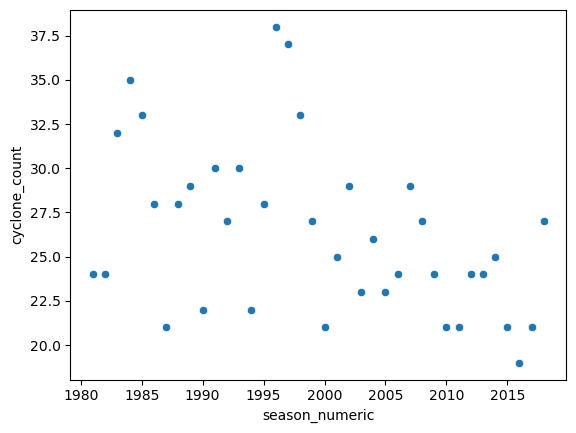

In [5]:
cyclone_counts_df = relevant_df.groupby('season_numeric').size().to_frame('cyclone_count').reset_index()
g = sns.scatterplot(data=cyclone_counts_df, x='season_numeric', y='cyclone_count')
g.get_figure().savefig('./media/cyclone_plot/all_storms.png')

In [6]:
# bit of noise in the cat 1s and 2s so we'll filter them out
one_per_id_severe = relevant_df.loc[one_per_id.loc[:, 'category'] >= 3]
print(one_per_id_severe.shape[0])
severe_counts_df = one_per_id_severe.groupby('season_numeric').size().to_frame('severe_count').reset_index()
severe_counts_df



326


,season_numeric,severe_count
0,1981,3
1,1982,7
2,1983,5
3,1984,7
4,1985,7
5,1986,2
6,1987,5
7,1988,13
8,1989,6
9,1990,7


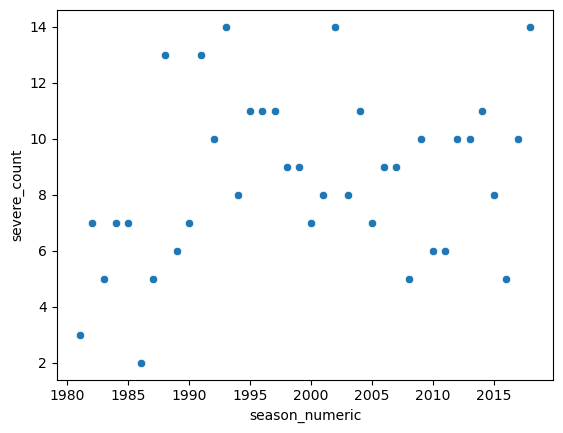

In [7]:
ax = sns.scatterplot(data=severe_counts_df, x='season_numeric', y='severe_count')
ax.get_figure().savefig('./media/cyclone_plot/severe_counts.png')

## Relative proportions of high-category cyclones

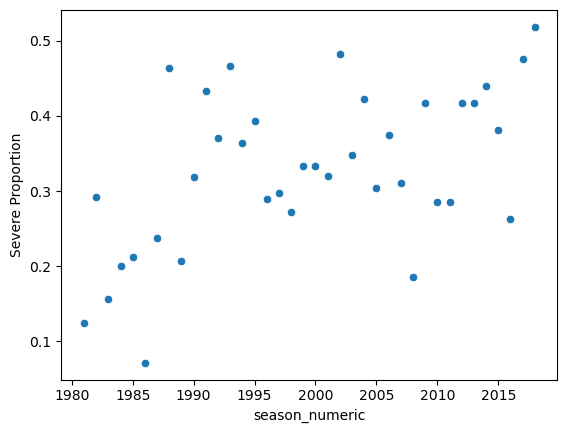

In [8]:
merged = cyclone_counts_df.merge(severe_counts_df)
merged['Severe Proportion'] = merged.loc[:,:].apply(lambda row: row['severe_count']/row['cyclone_count'], axis=1)
ax = sns.scatterplot(data=merged, x='season_numeric', y='Severe Proportion')
fig = ax.get_figure()
fig.savefig('./media/cyclone_plot/severe_prop.png')

### Expressing this in terms of accumulated Cyclone energy

In [9]:
irrelevant_df = relevant_df.copy()
irrelevant_df = irrelevant_df.loc[irrelevant_df.loc[:, 'category'] >= 4]
irrelevant_df['Wind speed (kn2)'] = irrelevant_df['Speed(knots)'].apply(lambda x: x * x)
irrelevant_df['Seasonal ACE'] = irrelevant_df.groupby('season_numeric')['Wind speed (kn2)'].transform('sum') / 10000
irrelevant_df



,id,Time,season,category,basin,season_numeric,latitude,longitude,Speed(knots),Wind speed (kn2),Seasonal ACE
1490,55,1983-12-05 18:00:00,1983-1984,4,SI,1983,-9.6,65.0,30,900,38.3550
1491,55,1983-12-06 00:00:00,1983-1984,4,SI,1983,-9.9,64.8,35,1225,38.3550
1492,55,1983-12-06 06:00:00,1983-1984,4,SI,1983,-10.0,64.2,40,1600,38.3550
1493,55,1983-12-06 12:00:00,1983-1984,4,SI,1983,-9.9,63.2,45,2025,38.3550
1494,55,1983-12-06 18:00:00,1983-1984,4,SI,1983,-9.8,62.2,50,2500,38.3550
...,...,...,...,...,...,...,...,...,...,...,...
30489,1000,2019-04-26 00:00:00,2018-2019,4,SI,2018,-12.4,39.4,60,3600,54.1875
30492,1000,2019-04-26 06:00:00,2018-2019,4,SI,2018,-12.7,39.1,50,2500,54.1875
30493,1000,2019-04-26 12:00:00,2018-2019,4,SI,2018,-13.1,38.9,40,1600,54.1875
30495,1000,2019-04-26 18:00:00,2018-2019,4,SI,2018,-13.5,38.8,30,900,54.1875


/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_28490/2466458536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unq['Rolling'] = unq.loc[:,'Seasonal ACE'].ewm(span = 1).mean()


<Axes: xlabel='season_numeric', ylabel='Rolling'>

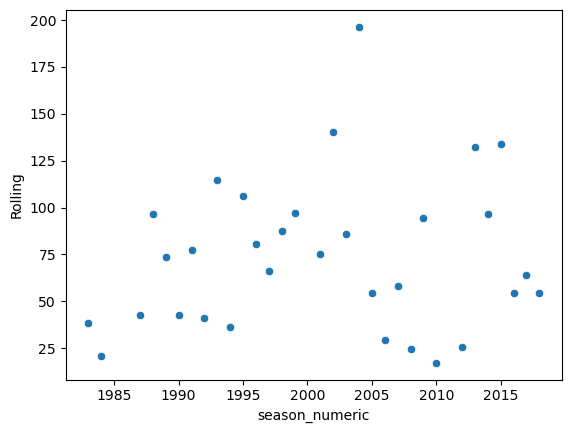

In [10]:
unq = irrelevant_df.drop_duplicates(subset='season')
unq['Rolling'] = unq.loc[:,'Seasonal ACE'].ewm(span = 1).mean()
sns.scatterplot(x="season_numeric", y="Rolling", data=unq)

## High category Cyclones: where have they occurred?

<Axes: xlabel='category', ylabel='Count'>

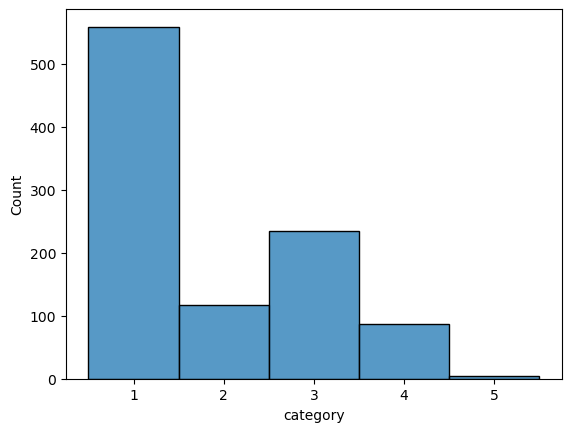

In [11]:
sns.histplot(one_per_id, x='category', discrete=True)



In [12]:
severe_cyclones = relevant_df.loc[relevant_df.loc[:, 'category'] >= 3]
severe_one_per_id = severe_cyclones.drop_duplicates(subset='id')
severe_one_per_id.shape[0] ## TOTAL OF 326 Cyclones >= category 3

326

In [13]:
## only show origin sites for now
min_long = severe_one_per_id['longitude'].min()
min_lat = severe_one_per_id['latitude'].min()

max_long = severe_one_per_id['longitude'].max()
max_lat = severe_one_per_id['latitude'].max()
centre_long = (max_long-min_long)/2

print('latitude: ' + str(min_lat) + ' to ' + str(max_lat))
print('longitude: ' + str(min_long) + ' to ' + str(max_long))

latitude: -28.2 to 1.9
longitude: 37.4 to 227.2


/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


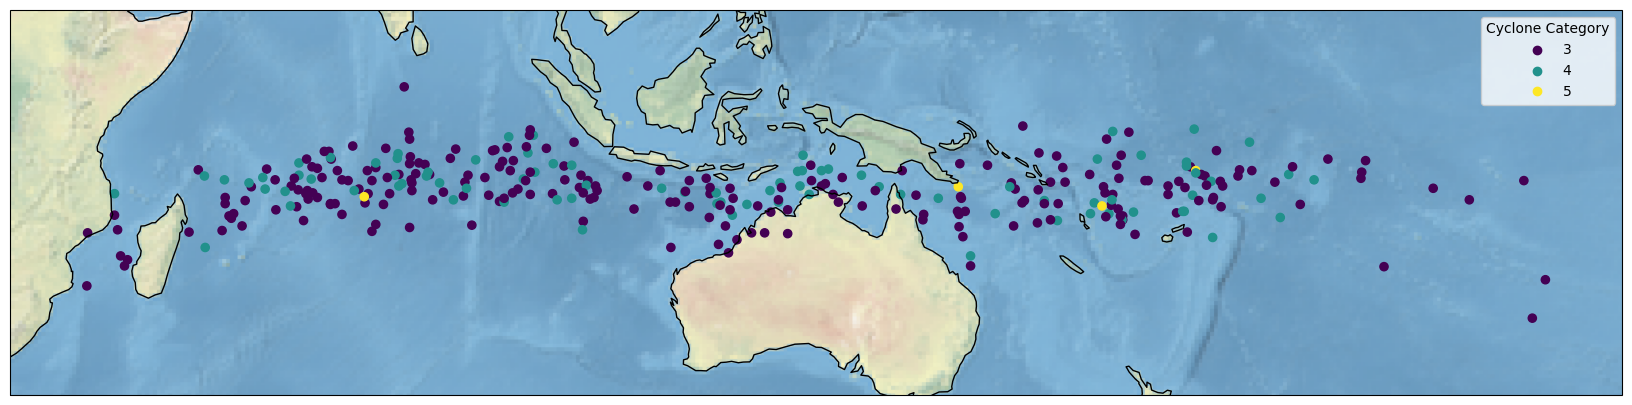

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


In [14]:
height = 5
fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()

scatter = plt.scatter(x=severe_one_per_id['longitude'], y=severe_one_per_id['latitude'], cmap='viridis',c=severe_one_per_id['category'], transform=ccrs.PlateCarree(), s=35)
ax.legend(*scatter.legend_elements(),title="Cyclone Category")
plt.show()
fig.savefig('./media/cyclone_map/all_severe.png')

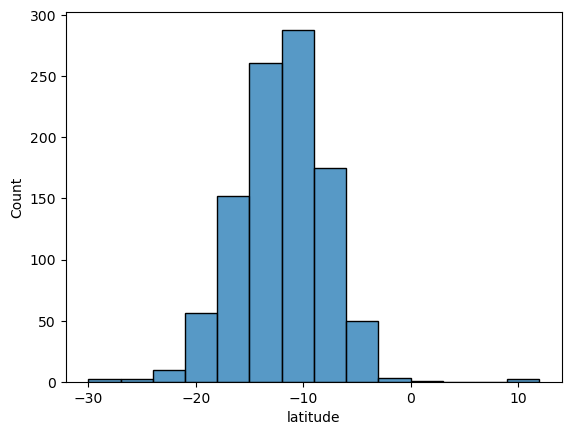

In [15]:
ax = sns.histplot(one_per_id, x='latitude', binwidth=3)
fig = ax.get_figure()
fig.savefig('./media/cyclone_plot/latitude.png')

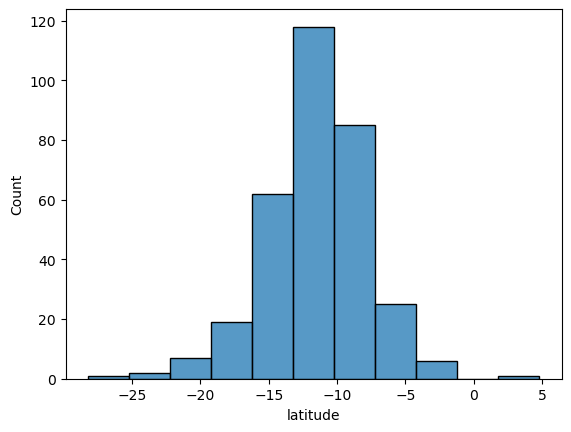

In [16]:
ax = sns.histplot(severe_one_per_id, x='latitude', binwidth=3)
fig = ax.get_figure()
fig.savefig('./media/cyclone_plot/latitude.png')

### When do cyclones mainly occur???


/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_28490/420923007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_month['numeric_month'] = with_month['Time'].apply(lambda t: get_datetime(t).month)


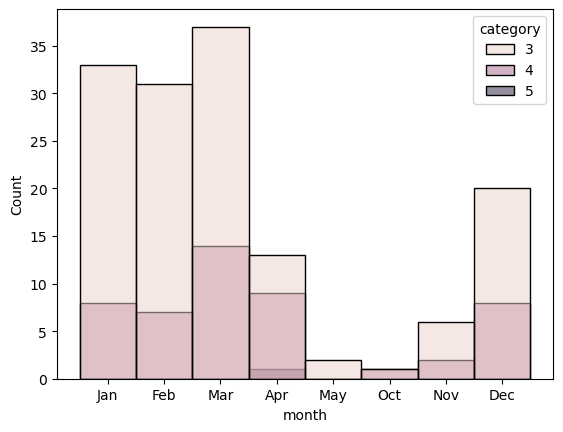

In [17]:
with_month = severe_one_per_id
with_month['numeric_month'] = with_month['Time'].apply(lambda t: get_datetime(t).month)
with_month = with_month.sort_values(by=['numeric_month'])
with_month['month'] = with_month['Time'].apply(lambda t: get_datetime(t).strftime('%b'))
sns.histplot(with_month.loc[with_month.loc[:, 'basin'] == 'SI'], x='month', hue='category',binwidth=3)
plt.show()

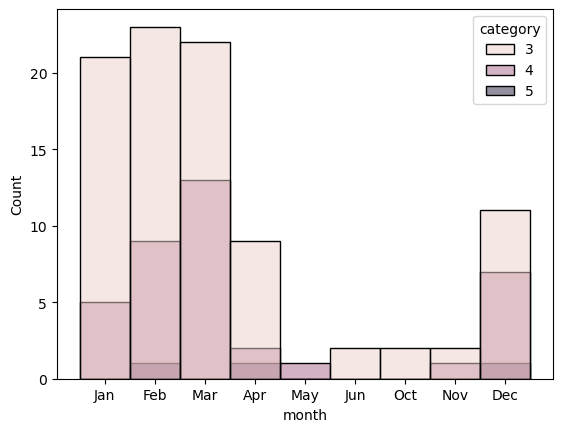

In [18]:
## OUTLIERS: severe cyclones developing outside of normal season

sns.histplot(with_month.loc[with_month.loc[:, 'basin'] == 'SP'], x='month', hue='category',binwidth=3)
plt.show()

### Tracks of the category 5s

In [19]:
cat_5s = relevant_df.loc[relevant_df.loc[:, 'Category'] == 5].drop_duplicates(subset='id')
cat_5s

KeyError: 'Category'

In [ ]:
# for some reason
# NOTE: this cyclone originated in the south pacific and came into the south indian
zoe_df = relevant_df.loc[relevant_df.loc[:, 'id'] == 600].sort_values(['Time'])
monica_df = relevant_df.loc[relevant_df.loc[:, 'id'] == 695].sort_values(['Time'])
winston_df = relevant_df.loc[relevant_df.loc[:, 'id'] == 927].sort_values(['Time'])
fantala_df = relevant_df.loc[relevant_df.loc[:, 'id'] == 934].sort_values(['Time'])

cat5_dfs = [
    {'df' : zoe_df, 'name': 'Zoe'}, 
    {'df': monica_df, "name": "Monica"}, 
    {"df": winston_df, "name": "Winston"}, 
    {"df": fantala_df, "name": "Fantala"}
]




In [ ]:
for dic in cat5_dfs:
    name = dic["name"]  
    df = dic["df"]
    print(name)
    print(f'min long: {df["longitude"].min()}')
    print(f'max long: {df["longitude"].max()}')
    print(f'min lat: {df["latitude"].min()}')
    print(f'max lat: {df["latitude"].max()}')
    print("====================")

Zoe
min long: 169.2
max long: 181.7
min lat: -21.9
max lat: -9.0
Monica
min long: 129.6
max long: 150.8
min lat: -14.2
max lat: -11.1
Winston
min long: 156.3
max long: 189.1
min lat: -27.4
max lat: -13.6
Fantala
min long: 48.2
max long: 73.5
min lat: -13.2
max lat: -7.3


In [ ]:
import shapely.geometry as sgeom
track_coords_list = [list(zip(obj["df"].longitude, obj["df"].latitude)) for obj in cat5_dfs]
track_objs = [sgeom.LineString(track_coords) for track_coords in track_coords_list]

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambafo

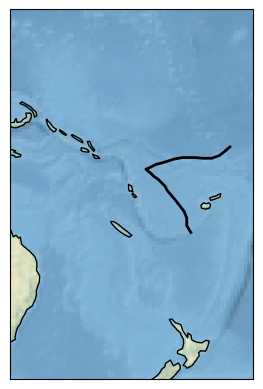

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


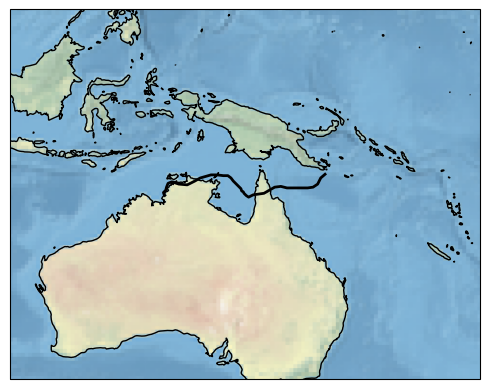

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


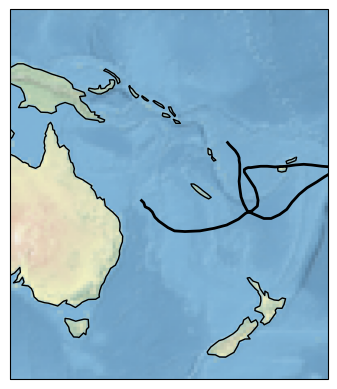

/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/albertdemskoy/mambaforge/envs/climateProjectEnv/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


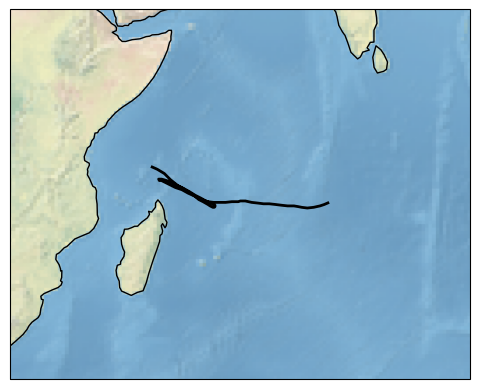

In [ ]:
for i in range(len(track_objs)):
    df = cat5_dfs[i]["df"]
    track_obj = track_objs[i]
    name = cat5_dfs[i]["name"]

    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=(df['longitude'].max() - df['longitude'].min())/2))
    # NOTE: set_extend doesnt like it when we overflow past 180
    ax.set_extent([df['longitude'].min() - 20, min(df['longitude'].max() + 20, 185) ,  df['latitude'].min() -  20, df['latitude'].max() + 20])
    ax.coastlines()
    ax.stock_img()

    colours = ['red', 'orange', 'green']
    ax.add_geometries([track_obj],ccrs.PlateCarree(), facecolor='none', linewidth=2)
    plt.show()
  

In [ ]:
severe_cyclones['wind_prop'] = severe_cyclones.apply(lambda row: row['Speed(knots)']/row['Peak Wind'], axis=1)
severe_cyclones['initial_time'] = severe_cyclones.groupby('id')['Time'].transform('min')

def diff_in_hours(timedelta):
    SECONDS_IN_HOUR = 3600
    return timedelta.total_seconds()/SECONDS_IN_HOUR

# 2006-04-24 06:00:00
TIME_FORMAT = "%Y-%m-%d %X"
severe_cyclones['elapsed_hours'] = severe_cyclones.apply(lambda row:  diff_in_hours(datetime.strptime(row['Time'], TIME_FORMAT) - datetime.strptime(row['initial_time'], TIME_FORMAT)), axis=1)
severe_cyclones






/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_5087/2932544078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_cyclones['wind_prop'] = severe_cyclones.apply(lambda row: row['Speed(knots)']/row['Peak Wind'], axis=1)
/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel_5087/2932544078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_cyclones['initial_time'] = severe_cyclones.groupby('id')['Time'].transform('min')
/var/folders/nk/f4_nbwvd0_vgzc0m31k7tc6m0000gn/T/ipykernel

,id,Time,season,Season,latitude,longitude,Speed(knots),Peak Wind,Category,wind_prop,initial_time,elapsed_hours
101,6,1982-01-06 00:00:00,1981-1982,1981,-12.7,102.9,20,120,3,0.166667,1982-01-06 00:00:00,0.0
102,6,1982-01-06 06:00:00,1981-1982,1981,-12.7,102.4,25,120,3,0.208333,1982-01-06 00:00:00,6.0
103,6,1982-01-06 12:00:00,1981-1982,1981,-12.8,101.8,25,120,3,0.208333,1982-01-06 00:00:00,12.0
104,6,1982-01-06 18:00:00,1981-1982,1981,-12.9,101.2,25,120,3,0.208333,1982-01-06 00:00:00,18.0
105,6,1982-01-07 00:00:00,1981-1982,1981,-13.0,100.4,25,120,3,0.208333,1982-01-06 00:00:00,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30507,999,2019-04-29 06:00:00,2018-2019,2018,-20.8,89.1,50,90,3,0.555556,2019-04-21 18:00:00,180.0
30508,999,2019-04-29 12:00:00,2018-2019,2018,-21.4,89.0,40,90,3,0.444444,2019-04-21 18:00:00,186.0
30509,999,2019-04-29 18:00:00,2018-2019,2018,-21.9,89.0,35,90,3,0.388889,2019-04-21 18:00:00,192.0
30510,999,2019-04-30 00:00:00,2018-2019,2018,-22.9,89.1,30,90,3,0.333333,2019-04-21 18:00:00,198.0


## How have cyclone formation sites been changing over time?

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

## only show origin sites for now
min_long = severe_one_per_id['longitude'].min()
min_lat = severe_one_per_id['latitude'].min()

max_long = severe_one_per_id['longitude'].max()
max_lat = severe_one_per_id['latitude'].max()
centre_long = (max_long-min_long)/2


HEIGHT = 5
# fig = plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
# ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
# ax.coastlines()
# ax.stock_img()
# plt.scatter(x=severe_one_per_id['longitude'], y=severe_one_per_id['latitude'], cmap='viridis',c=severe_one_per_id['Category'], transform=ccrs.PlateCarree(), s=25)
# plt.show()

# take rolling mean
RUN_ANIMATION = False
if RUN_ANIMATION:


    fig =  plt.figure(figsize=((max_long - min_long)/(max_lat-min_lat)*height, height))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude= centre_long))
    ax.set_extent([min_long - 10, max_long + 10 ,min_lat - 10,max_lat + 10], ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    
   
    output = None

    def animate(time):
        global output
        fig.suptitle("Time: " + severe_one_per_id['Time'].iloc[time], fontsize= 22)
        if (output is not None):
            output.remove()
        output = plt.scatter(x=severe_one_per_id['longitude'].iloc[max(time - 50, 0):time], y=severe_one_per_id['latitude'].iloc[max(time - 50, 0):time], cmap='viridis',c=severe_one_per_id['Category'].iloc[max(time - 50, 0):time], transform=ccrs.PlateCarree(), s=30)
        

    ani = animation.FuncAnimation(fig, animate, frames= range(0, severe_one_per_id.shape[0]))


    ani.save('./media/cyclone_animation.gif', writer='imagemagick', fps = 14) #Save animation as gif-file